In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sms_raw = pd.read_csv("imdb_labelled.txt", delimiter= '\t', header=None)
sms_raw.columns = ['feedback', 'Good']

In [41]:
sms_raw.head(10)

,feedback,Good,good,entertaining,best,well,beautiful,genius,funny,loved,10,pretty,classic
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,True,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",0,False,False,False,False,False,False,False,False,False,False,False
6,Wasted two hours.,0,False,False,False,False,False,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,1,True,False,False,False,False,False,False,False,False,False,False
8,A bit predictable.,0,False,False,False,False,False,False,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,1,False,False,False,False,False,False,False,False,False,False,False


In [31]:
keywords = ['good', 'entertaining', 'best', 'well', 'beautiful', 'genius', 'funny', 'loved', '10','pretty','classic']

for key in keywords:
    sms_raw[str(key)] = sms_raw.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

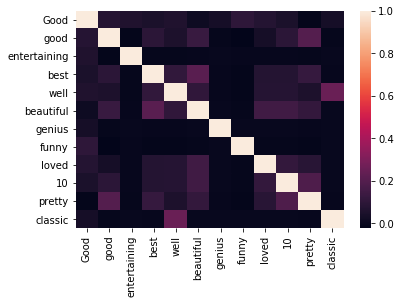

In [32]:
sns.heatmap(sms_raw.corr())

In [33]:
data = sms_raw[keywords]
target = sms_raw['Good']

In [40]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

clf = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

# Fit our model to the data.
#clf.fit(data, target)
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 331
